In [1]:
!pip install -U sentence-transformers

In [2]:
from sentence_transformers import SentenceTransformer
import os

# DATASET = 'OSCE'
# DATASET = 'OSCE/dor_toracica_x_infarto'
DATASET = "clicr"

# FILE = '../datasets/' + DATASET + '/respostas_ingles.txt'
# FILE = '../datasets/' + DATASET + '/sequences.txt'
FILE = '../datasets/' + DATASET + '/titles-sem-mark.txt'


# MODEL = 'bert-base-cased'
# MODEL = 'dmis-lab/biobert-base-cased-v1.1'
MODEL = 'fagner/envoy'

# MODEL = 'sts-bert'
# MODEL = 'iln-biobert'

# MODEL = 'iln-envoy'

# MODEL = 'all-mpnet-base-v2 '

# DATASET = 'OSCE(by-oracao)'

# DATASET = 'control_test/'
# FILE = '../datasets/control_test.txt'

# MODEL = 'sts-biobert-base-cased'
# MODEL = 'sts-envoy' 
# MODEL = 'sts-biobert-base-cased'

# MODEL = 'bert-sentence-STS'
# MODEL = 'biobert-sentence-STS'
# MODEL = 'envoy-sentence-STS'


# MODEL_PATH = '../../models/' + MODEL

# model = SentenceTransformer(MODEL_PATH)
model = SentenceTransformer(MODEL)
# model.max_seq_length = 512
# OUTPUT_PATH = 'output_from_2/' + DATASET + '/'+ MODEL + '/best'
OUTPUT_PATH = 'output_from_2/' + DATASET + '/'+ MODEL

if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

No sentence-transformers model found with name /home/jovyan/.cache/torch/sentence_transformers/fagner_envoy. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/jovyan/.cache/torch/sentence_transformers/fagner_envoy were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at /home/jovyan/.cache/torch/sentence_transformers/fagner_envoy and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bia

In [3]:
sentences_temp = []
tam = 0
with open(FILE) as f:
    sentences_temp = f.readlines()

sentences = []
for s in sentences_temp:
    sentences.append(s.replace('\n',''))
    tam += len(s)

print(tam/len(sentences))

# print('Sentenças: ', sentences)

79.12809564474807


In [4]:
embeddings = model.encode(sentences)
# embeddings = model.encode(sentences[:100])

# for sentence, embedding in zip(sentences, embeddings):
#     print("answer:", sentence)
#     print("Embedding:", len(embedding))
#     print("")


In [5]:
with open(OUTPUT_PATH + '/word_embeddings.tsv', "w") as e_file, open(OUTPUT_PATH + '/labels.tsv', "w") as l_file:
    for id, (answer, embedding) in enumerate(zip(sentences, embeddings)):
        tsv_row = ''
        for e in embedding:
            tsv_row += str(e) + '\t'
        print(tsv_row, file=e_file)   
        print(answer, file=l_file)


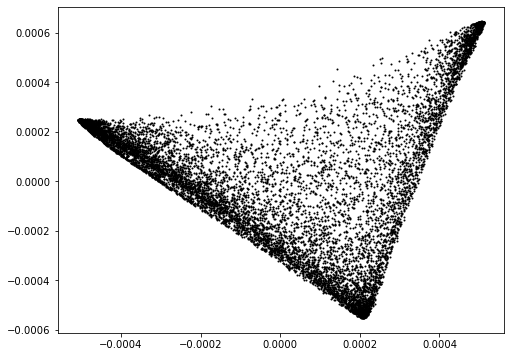

In [6]:
from matplotlib import pyplot as plt 
from sklearn import manifold

X_2d = manifold.SpectralEmbedding(n_components=2).fit_transform(embeddings)

x = X_2d[:,0]
y = X_2d[:,1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='black', s=1)

# for i, sentence in enumerate(sentences):
#     plt.annotate(sentence, (x[i], y[i]), fontsize=15)

plt.savefig(OUTPUT_PATH + '/sentence-embeddings30sts')